In [15]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

from kaggle_prediction_interval_birthweight.model.sampling_utils import (
    compute_highest_density_interval,
)
from kaggle_prediction_interval_birthweight.workflow.metric import score
from kaggle_prediction_interval_birthweight.data.data_processing import DataProcessor
from kaggle_prediction_interval_birthweight.model.linear_regression import (
    RidgeRegressor,
)
from kaggle_prediction_interval_birthweight.model.hist_gradient_boosting import (
    HistBoostRegressor,
)
from kaggle_prediction_interval_birthweight.model.neural_network import BayesianNeuralNet
from kaggle_prediction_interval_birthweight.model.ensembler import (
    Ensembler,
)

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
data = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

In [4]:
train_processor = DataProcessor(model_type="linear regression")
X, y = train_processor(data)

test_processor = DataProcessor(
    model_type="linear regression",
    feature_categories=train_processor.feature_categories,
    standardization_parameters=train_processor.standardization_parameters,
)
X_test = test_processor(data_test)

In [5]:
ridge_regressor = RidgeRegressor().fit(X, y)

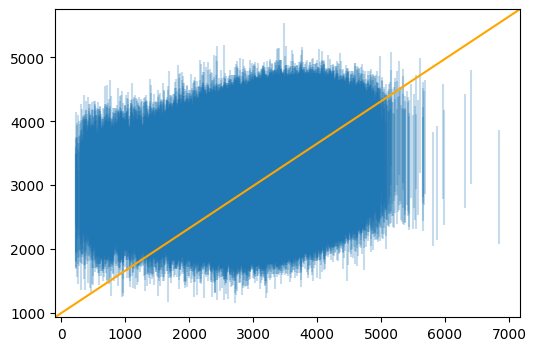

In [6]:
lower_ridge, upper_ridge = ridge_regressor.predict_intervals(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_ridge, ymax=upper_ridge, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

In [ ]:
train_processor = DataProcessor(model_type="neural network")
X, y = train_processor(data)

bayesian_net = BayesianNeuralNet(n_units=3)
bayesian_net.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


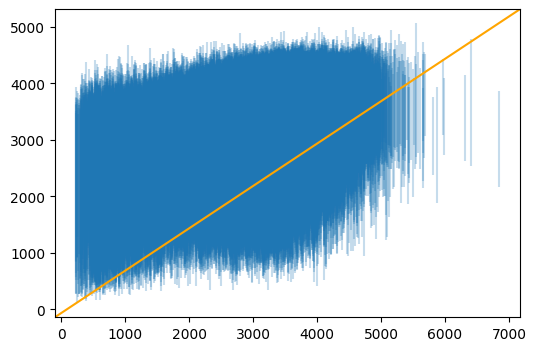

In [7]:
train_processor = DataProcessor(model_type="xgboost")
X, y = train_processor(data)

histboost_regressor = HistBoostRegressor()
histboost_regressor.fit(X, y)

lower_histboost, upper_histboost = histboost_regressor.predict_intervals(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_histboost, ymax=upper_histboost, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

In [8]:
ensembler = Ensembler()
ensembler.fit(data)

Ensembler fold 1 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Ensembler fold 2 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Ensembler fold 3 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the ensemble model.
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits


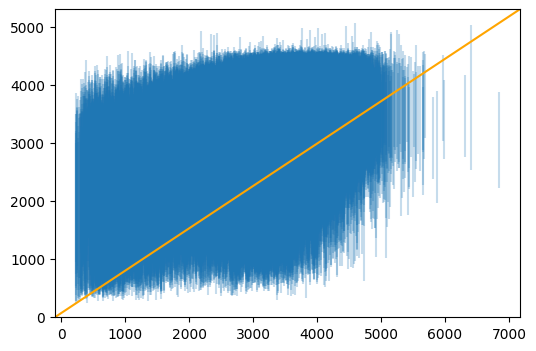

In [9]:
lower_ensemble, upper_ensemble = ensembler.predict_intervals(data)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_ensemble, ymax=upper_ensemble, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

Coverage is 90.0%


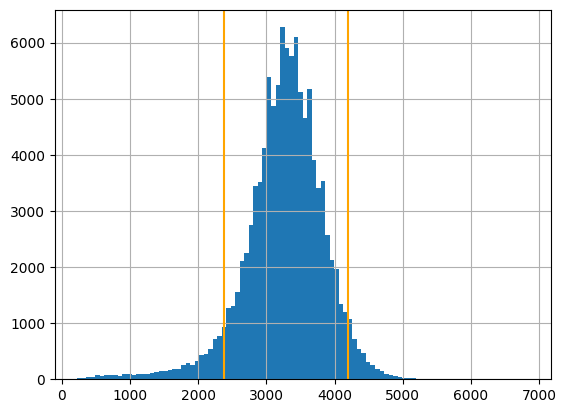

In [10]:
lower, upper = compute_highest_density_interval(data["DBWT"])

print(f"Coverage is {data['DBWT'].between(lower, upper).mean() * 100:.1f}%")

data["DBWT"].hist(bins=100)
plt.axvline(lower, color="orange")
plt.axvline(upper, color="orange")
plt.show()

In [11]:
nois, coverage = score(data["DBWT"].values, lower, upper, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1904.4, and coverage is 90.0%


In [12]:
nois, coverage = score(data["DBWT"].values, lower_ridge, upper_ridge, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1862.5, and coverage is 91.4%


In [13]:
nois, coverage = score(data["DBWT"].values, lower_histboost, upper_histboost, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1602.0, and coverage is 90.0%


In [14]:
nois, coverage = score(data["DBWT"].values, lower_ensemble, upper_ensemble, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1646.7, and coverage is 90.8%
